
# <center> UDACITY Data Analysis Nanodegree </center> 
## <center> Project:- Visualizing FordGoBike Data</center>
#### Grant Patience, 16th September 2019


***
# Table of Contents

1. [Determine Objectives and Assess the Situation](#Problemunderstanding)
    1. [Outline of Steps](#outline)
    2. [What are the Desired Outputs](#Desiredoutputs)
    3. [What Resources are Available?](#Resources)
    4. [What Questions Are We Trying to Answer?](#QA)
2. [Data Wrangling and Understanding](#Dataunderstanding)
    1. [Data Description](#DataDescription)
    2. [Data Gathering](#DataGather)
    3. [Describe the Data's General Properties](#Describedata)
    4. [Assess Data Quality](#Verifydataquality)
        1. [Quality](#Quality) 
            1. [Missing Data](#Missing) 
            2. [Duplicates](#Duplicates) 
            3. [Outliers](#Outliers) 
        2. [Tidiness](#Tidiness) 
    5. [Data Summary Report](#datasummaryreport) 
    6. [Data Cleansing](#datacleansing) 
3. [Exploratory Data Analysis](#eda) 
    1. [Data Structure](#structure)
    2. [Main Features](#mainfeatures)
    2. [Univariate](#univariate)
    2. [Bivariate](#bivariate)
    2. [Multi variate](#multivariate)
4. [Conclusion](#conclusion)
5. [References](#references)

## Intorduction

According to [Wikipedia](https://en.wikipedia.org/wiki/Bay_Wheels), 

>Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
> 
>Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company.
> 
> After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.[5] The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

The data can be found [here](https://www.lyft.com/bikes/bay-wheels/system-data)

***
# 1. Determine Objectives and Assess the Situation  <a class="anchor" id="Problemunderstanding"></a>
For this project we will use the  __[CRISP-DM process](https://www.sv-europe.com/crisp-dm-methodology/)__.  The first stage of the CRISP-DM process is to understand what you want to accomplish. The goal of this stage of the process is to uncover important factors that could influence the outcome of the project. 


## 1.1 Outline of Steps <a class="anchor" id="outline"></a>
- We state what [resources](#Resources) are available to us and in [this](#Problemunderstanding) section we discuss what it is we wish to achieve, 
- We decide which [Questions](#QA) we want to ask of the data 
- We will [Gather the Data ](#DataGather) that we need 
- Import the data into Python to perform some initial [Understanding of the data](#Describedata) to help us understand the data, and [Assess Data Quality](#Verifydataquality) and perform any resolve any [Data Cleansing](#datacleansing).
- Perform [Exploratory Data Analysis](#eda) where we will research the answers to our questions
- Create visualisations to aid exploration and research 
- Draw our [Conclusion](#conclusion) based on the data and communicate our findings


## 1.2 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>
 
 - Accurate project submission:
 
 > - Ensure you meet specifications for all items in the Project Rubric. Your project "meets specifications" only if it meets specifications for all of the criteria.

***

## 1.3 What Resources are Available? <a class="anchor" id="Resources"></a>
- UDACITY [Rubric](https://review.udacity.com/#!/rubrics/1136/view) for guidance on project submission
- Dataset supplied and gathered (Details in Section [Data Description](#DataDescription) )

***

# 2. Data Wrangling and Understanding <a class="anchor" id="Dataunderstanding"></a>
The second stage of the process is where we acquire the data listed in the project resources. Describe the methods used to acquire them and any problems encountered. We record problems you encountered and any resolutions achieved. Tis includes any data quality issues, and any resolution steps taken. This initial collection includes extraction details and source details, and subsequently loaded into Python and analysed in Jupyter notebook. 

## Preliminary Wrangling


## 2.1 Data Description <a class="anchor" id="DataDescription"></a>


The Data
Each trip is anonymized and includes:

- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender

## 2.2 Data Gathering <a class="anchor" id="DataGather"></a>



### Data Extraction
The csv files are saved manually from the FordGoBike website [here](https://www.lyft.com/bikes/bay-wheels/system-data) to a locally hosted hard drive. 

Using <code>glob</code> and <code>os</code> packes to store, load, and combine the files into one master, fordgo_master.csv:

In [133]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import glob
import os

path = r'D:\Data\FordGoBike'


The following was used to combine all the CSV files. Only required to do this once so commented out for future runs, but maintainedh ere for reference:
<code>
files = glob.glob(os.path.join(path, "*.csv"))
df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)
df.to_csv(os.path.join(path,r'fordgo_master.csv'), index = False) </code>

In [134]:
df = pd.read_csv(os.path.join(path,r'fordgo_master.csv'))

D:\Program_Files\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2.3 Describe Data's General Properties <a class="anchor" id="Describedata"></a>
In this section we describe the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies requirements.

In [135]:
df.head(3)

,Unnamed: 16,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,2765,No,75284,285.0,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.8240,1986.0,Male,NaN,120.0,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.2390,Subscriber
1,NaN,2815,No,85422,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.3100,NaN,NaN,NaN,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.3510,Customer
2,NaN,3039,No,71576,296.0,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.1160,1996.0,Male,NaN,304.0,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.8890,Customer


In [136]:
df.tail(3)

,Unnamed: 16,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
3308429,clipper,896256,NaN,370,254.0,37.880222,-122.269592,Vine St at Shattuck Ave,2019-07-26 12:56:59,1964.0,F,NaN,NaN,37.891297,-122.279522,NaN,2019-07-26 12:50:49,Subscriber
3308430,app,440004,NaN,593,NaN,37.881075,-122.270206,NaN,2019-07-30 20:36:41,NaN,?,NaN,NaN,37.892187,-122.272764,NaN,2019-07-30 20:26:47,Subscriber
3308431,app,512019,NaN,1716,409.0,37.839543,-122.298718,2100 Powell St,2019-07-31 07:23:39,1983.0,F,NaN,NaN,37.895300,-122.269339,NaN,2019-07-31 06:55:02,Subscriber


In [137]:
df.sample(5)

,Unnamed: 16,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2371260,NaN,5402,No,373,87.0,37.769757,-122.415674,Folsom St at 13th St,2019-03-16 17:06:45.9380,1978.0,Male,NaN,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2019-03-16 17:00:32.2540,Subscriber
680061,NaN,1646,No,656,59.0,37.774814,-122.418954,S Van Ness Ave at Market St,2018-06-22 14:05:06.9230,1983.0,Male,NaN,120.0,37.761420,-122.426435,Mission Dolores Park,2018-06-22 13:54:10.1550,Subscriber
1055282,NaN,2901,No,1045,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2018-08-26 10:31:07.7700,1984.0,Male,NaN,73.0,37.771793,-122.433708,Pierce St at Haight St,2018-08-26 10:13:42.7340,Subscriber
592606,NaN,3687,No,3764,70.0,37.773311,-122.444293,Central Ave at Fell St,2018-05-06 12:18:30.9710,1989.0,Female,NaN,84.0,37.769200,-122.433812,Duboce Park,2018-05-06 11:15:46.7720,Customer
2378367,NaN,4417,No,604,21.0,37.789625,-122.400811,Montgomery St BART Station (Market St at 2nd St),2019-03-15 18:34:02.1710,1983.0,Male,NaN,58.0,37.776619,-122.417385,Market St at 10th St,2019-03-15 18:23:57.2590,Subscriber


In [138]:
df.nunique()

Unnamed: 16                      2
bike_id                       7560
bike_share_for_all_trip          2
duration_sec                 19869
end_station_id                 386
end_station_latitude         21854
end_station_longitude        21944
end_station_name               407
end_time                   3307849
member_birth_year               95
member_gender                    7
rental_access_method             2
start_station_id               386
start_station_latitude       21147
start_station_longitude      21202
start_station_name             407
start_time                 3307861
user_type                        2
dtype: int64

In [139]:
# Look at our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308432 entries, 0 to 3308431
Data columns (total 18 columns):
Unnamed: 16                object
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
rental_access_method       object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(9)
memory usage: 454.3+ MB


In [140]:
df.shape

(3308432, 18)

In [141]:
df.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,3.308432e+06,3.308432e+06,3.273989e+06,3.308432e+06,3.308432e+06,3.095748e+06,3.274717e+06,3.308432e+06,3.308432e+06
mean,7.368725e+03,8.295888e+02,1.267834e+02,3.776679e+01,-1.223480e+02,1.983811e+03,1.284679e+02,3.776684e+01,-1.223491e+02
std,5.120179e+04,2.175275e+03,1.074653e+02,1.379897e-01,3.227329e-01,1.034036e+01,1.075879e+02,1.083253e-01,1.654216e-01
min,1.100000e+01,6.000000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,1.878000e+03,3.000000e+00,0.000000e+00,-1.224737e+02
25%,1.399000e+03,3.490000e+02,3.600000e+01,3.777106e+01,-1.224108e+02,1.979000e+03,3.700000e+01,3.777041e+01,-1.224117e+02
50%,2.686000e+03,5.550000e+02,9.100000e+01,3.778107e+01,-1.223971e+02,1.986000e+03,9.300000e+01,3.778101e+01,-1.223974e+02
75%,3.888000e+03,8.690000e+02,1.970000e+02,3.779728e+01,-1.222887e+02,1.991000e+03,2.000000e+02,3.779728e+01,-1.222856e+02
max,9.969630e+05,8.636600e+04,4.430000e+02,4.551000e+01,0.000000e+00,2.001000e+03,4.430000e+02,4.551000e+01,0.000000e+00


## 2.4 Assess Data Quality <a class="anchor" id="Verifydataquality"></a>

Examine the quality of the data, addressing questions such as:

- Is the data complete (does it cover all the cases required)?
- Is it correct, or does it contain errors and, if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

In [142]:
df.nunique()

Unnamed: 16                      2
bike_id                       7560
bike_share_for_all_trip          2
duration_sec                 19869
end_station_id                 386
end_station_latitude         21854
end_station_longitude        21944
end_station_name               407
end_time                   3307849
member_birth_year               95
member_gender                    7
rental_access_method             2
start_station_id               386
start_station_latitude       21147
start_station_longitude      21202
start_station_name             407
start_time                 3307861
user_type                        2
dtype: int64

In [143]:
# Check for Nan values?
df.isna().sum()

Unnamed: 16                3278808
bike_id                          0
bike_share_for_all_trip      33517
duration_sec                     0
end_station_id               34443
end_station_latitude             0
end_station_longitude            0
end_station_name             34440
end_time                         0
member_birth_year           212684
member_gender               209732
rental_access_method       3304539
start_station_id             33715
start_station_latitude           0
start_station_longitude          0
start_station_name           33711
start_time                       0
user_type                        0
dtype: int64

### 2.4.1. Quality <a class="anchor" id="Quality"></a>

#### Missing Data <a class="anchor" id="Missing"></a>
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column 

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem

In [144]:
# Function that will take an input table with aggregated values to columns, and then create an output table with 
# two columns - the values and the percentage of total values in that column
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [145]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
rental_access_method,3304539,99.9
Unnamed: 16,3278808,99.1
member_birth_year,212684,6.4
member_gender,209732,6.3
end_station_id,34443,1.0
end_station_name,34440,1.0
start_station_id,33715,1.0
start_station_name,33711,1.0
bike_share_for_all_trip,33517,1.0


- Looks like rental_access_method is mostly null
- A good number of Start locations are null
- Some of the member gender and date of birth are also null

**Options**
- We may want to remove null rows entirely from the dataset. To do so we would run something like the following
```python
df.dropna()
```

- We may want to drop the columns if they appear to be predominantly NA. To do so we would run something like the following
```python
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))
df = df.drop(list(missing_columns))
```

- We may want to fill the missing values with the mean values from the dataset. To do so we would run something like the following
```python
mean = df['x'].mean()
df['x'].fillna(mean, inplace=True)

#### Duplicates <a class="anchor" id="Duplicates"></a>
There may be duplicates in the data. However, these may be legitimate new rows depending on the structure of the data. We need to discover them, then decide what to do with them

In [146]:
# Check for duplicates
df.duplicated().sum()

0

Looks like we have no dupicates, great news!

**Options**
We may want to remove duplicate rows entirely from the dataset. To do so we would run the following
```python 
df.drop_duplicates(inplace=True)
```

#### Outliers <a class="anchor" id="Outliers"></a>
At this point, we may also want to remove outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values. For this project, we will remove anomalies based on the definition of extreme outliers:


## Data Summary Report <a class="anchor" id="datasummaryreport"></a>

| Category        | Data set           | Issue  | Resolved | 
| ------------- |:-------------:| -----:|-----:| 
| Quality     | df  | There are missing values (start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year, member_gender) | Y | 
| Quality     | df  | Start/end times are not in the timestamp format | Y | 
| Quality     | df  | User type, gender, and bike share for all to category format | Y | 
| Tidiness     | df  | Erroneous column Unnamed: 16  | Y | 
| Tidiness     | df  | There's a mixture of gender categories, e.g. Male/M and Female/F. Change to consistent values.  | Y | 
| Feature Engineer     | df  | Can work out Age into an easier to use atribute  | Y | 
| Feature Engineer     | df  | Can work out distance travelled into an easier to use atribute  | Y | 
| Feature Engineer     | df  | Add age brackets to summarise age populations for analysis purposes  | Y | 


## Data Cleansing <a class="anchor" id="datacleansing"></a>
Cleasning our data is the final step in data wrangling. We will fix the quality and tidiness issues that we identified in the assess step.

In [147]:
#copy dataframes - always keep the originals intact
df_clean = df.copy()

##### Define

We can drop <code>rental_access_method</code> and <code> Unnamed: 16 </code> columns. 
Leave others as is since we can't easily determine the values they should be.

##### Code

In [148]:
df_clean.columns

Index(['Unnamed: 16', 'bike_id', 'bike_share_for_all_trip', 'duration_sec',
       'end_station_id', 'end_station_latitude', 'end_station_longitude',
       'end_station_name', 'end_time', 'member_birth_year', 'member_gender',
       'rental_access_method', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'start_station_name', 'start_time',
       'user_type'],
      dtype='object')

In [149]:
drop_cols = ['rental_access_method', 'Unnamed: 16']
# dropping passed columns 
df_clean.drop(drop_cols, axis = 1, inplace = True) 

##### Test

In [150]:
df_clean.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

##### Define

Converting time columns to the appropriate data type

##### Code

In [151]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308432 entries, 0 to 3308431
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 403.9+ MB


In [152]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

##### Test

In [153]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308432 entries, 0 to 3308431
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 403.9+ MB


##### Define

Converting category like columns to the appropriate data type

##### Code

In [154]:
# Cuser_type, member_gender, and bike_share_for_all_trip to category 
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

##### Test

In [155]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308432 entries, 0 to 3308431
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 337.6+ MB


##### Define

Converting category like columns to the appropriate data type

##### Code

In [156]:
# Cuser_type, member_gender, and bike_share_for_all_trip to category 
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

##### Test

In [157]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3308432 entries, 0 to 3308431
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(3), datetime64[ns](2), float64(7), int64(2), object(2)
memory usage: 337.6+ MB


##### Define

Add columns for the age to create an easy to use attribute for analysis

##### Code

In [158]:
# Subtracting the member_birth_year from the current year to get the ages of the members
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

##### Test

In [159]:
df_clean['member_age'].sample(10)

2011297    19.0
2534632    33.0
893934     23.0
3209877    27.0
389693     37.0
1816129    25.0
2532853    36.0
1103558    30.0
2963691    23.0
12312      37.0
Name: member_age, dtype: float64

Looks good

In [160]:
df_clean['member_age'].value_counts()

31.0     178377
30.0     156007
29.0     150493
32.0     149177
26.0     145752
28.0     145688
27.0     134656
33.0     133347
34.0     131444
25.0     123330
35.0     120621
36.0     109242
24.0     108132
37.0     101675
39.0      85299
38.0      84179
23.0      74788
40.0      66060
42.0      61100
41.0      59427
22.0      52943
44.0      52837
43.0      47720
45.0      47561
21.0      44364
46.0      41471
48.0      39855
51.0      38867
47.0      36581
54.0      34070
          ...  
117.0       253
84.0        233
78.0        216
99.0        153
95.0        134
123.0        84
85.0         81
80.0         79
118.0        76
81.0         60
79.0         42
87.0         38
92.0         29
115.0        25
131.0        23
91.0         22
105.0        18
129.0         7
141.0         7
96.0          6
130.0         5
138.0         5
110.0         4
120.0         3
89.0          3
113.0         2
116.0         1
109.0         1
100.0         1
133.0         1
Name: member_age, Length

Looks like there are some strange values - probably realted to incorrect birth years in the data. We might be better removing these from the data

##### Define

Clean the new <code>member_age</code> so that it has reasonable values

##### Code

In [161]:
# Check stats
df_clean.member_age.describe()

count    3.095748e+06
mean     3.518876e+01
std      1.034036e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.410000e+02
Name: member_age, dtype: float64

Top 75% of members are aged 40 or lower

In [162]:
# Check 99th Percentile
df_clean.member_age.describe(percentiles = [.99])

count    3.095748e+06
mean     3.518876e+01
std      1.034036e+01
min      1.800000e+01
50%      3.300000e+01
99%      6.500000e+01
max      1.410000e+02
Name: member_age, dtype: float64

99% of users are aged 65 or below. A reasonable assumption to make now is that anyone under the age of 65 would be most likely.

In [163]:
# Keep the records were the members are under 65 
df_clean = df_clean.query('member_age <= 65')

In [164]:

# Convert the member_age and birth year to integer format
df_clean.member_age = df_clean.member_age.astype(int)

##### Test

In [165]:
df_clean['member_age'].value_counts()

31    178377
30    156007
29    150493
32    149177
26    145752
28    145688
27    134656
33    133347
34    131444
25    123330
35    120621
36    109242
24    108132
37    101675
39     85299
38     84179
23     74788
40     66060
42     61100
41     59427
22     52943
44     52837
43     47720
45     47561
21     44364
46     41471
48     39855
51     38867
47     36581
54     34070
49     32964
20     30316
50     29832
52     26584
56     23891
53     21274
55     21051
57     20429
58     18095
59     15517
19     14844
60     13372
61     12699
62     11290
63      8527
65      6317
64      4576
18       885
Name: member_age, dtype: int64

##### Define

Add easy to use columns for analysis purposes for the month, day of the week, and hour

##### Code

In [166]:
# Start Date
df_clean['start_date'] = df_clean['start_time'].dt.strftime('%d/%m/%Y')

In [167]:
# Start month January - December
df_clean['start_month'] = df_clean['start_time'].dt.strftime('%B-%Y')

In [168]:
# Start year
df_clean['start_year'] = df_clean['start_time'].dt.strftime('%Y')

In [169]:
# Start time weekday Monday - Sunday
df_clean['start_weekday'] = df_clean['start_time'].dt.strftime('%a')

In [170]:
# Start and end time hour
df_clean['start_time_hour'] = df_clean['start_time'].dt.hour
df_clean['end_time_hour'] = df_clean['end_time'].dt.hour

##### Test

In [171]:
df_clean.sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_station_name,start_time,user_type,member_age,start_date,start_month,start_year,start_weekday,start_time_hour,end_time_hour
2583666,2571,No,614,81.0,37.775880,-122.393170,Berry St at 4th St,2019-04-17 09:18:46.195,1979.0,Female,...,Beale St at Harrison St,2019-04-17 09:08:31.398,Subscriber,40,17/04/2019,April-2019,2019,Wed,9,9
3098673,3716,No,2512,399.0,37.802636,-122.436289,Bay St at Fillmore St,2019-06-02 16:06:26.187,1982.0,Female,...,22nd St Caltrain Station,2019-06-02 15:24:34.116,Subscriber,37,02/06/2019,June-2019,2019,Sun,15,16
1914952,4517,No,228,91.0,37.771762,-122.398438,Berry St at King St,2019-01-25 17:10:14.180,1990.0,Female,...,4th St at 16th St,2019-01-25 17:06:25.527,Subscriber,29,25/01/2019,January-2019,2019,Fri,17,17
1378845,803,No,308,17.0,37.792251,-122.397086,Embarcadero BART Station (Beale St at Market St),2018-09-05 07:47:43.576,1961.0,Male,...,Beale St at Harrison St,2018-09-05 07:42:34.951,Subscriber,58,05/09/2018,September-2018,2018,Wed,7,7
1527763,1945,No,663,149.0,37.831275,-122.285633,Emeryville Town Hall,2018-10-11 09:43:32.823,1979.0,Male,...,Ninth St at Parker St,2018-10-11 09:32:28.852,Subscriber,40,11/10/2018,October-2018,2018,Thu,9,9


In [172]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067526 entries, 0 to 3308431
Data columns (total 23 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 int32
start_date                 object
start_month                object
start_year                 object
start_weekday              object
start_time_hour            int64
end_time_hour              int64
dtypes: category(3), datetime64[ns](2), float64(7), int32(1), int64(4), object(6)

##### Define

Work out the duration of the trip duration in minutes for analysis

##### Code

In [173]:
# Duration in minutes
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)

##### Test

In [174]:
df_clean.sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_time,user_type,member_age,start_date,start_month,start_year,start_weekday,start_time_hour,end_time_hour,duration_min
3168238,1903,No,479,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2019-07-19 21:04:52.043,1965.0,Male,...,2019-07-19 20:56:52.707,Subscriber,54,19/07/2019,July-2019,2019,Fri,20,21,7
1735419,4903,Yes,237,258.0,37.872355,-122.266447,University Ave at Oxford St,2018-12-30 23:58:59.079,1998.0,Male,...,2018-12-30 23:55:01.616,Subscriber,21,30/12/2018,December-2018,2018,Sun,23,23,3
2143058,6309,Yes,67,34.0,37.783988,-122.412408,Father Alfred E Boeddeker Park,2019-02-17 10:09:33.891,1991.0,Male,...,2019-02-17 10:08:26.462,Subscriber,28,17/02/2019,February-2019,2019,Sun,10,10,1
1928753,4361,No,574,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2019-01-24 08:30:42.971,1983.0,Male,...,2019-01-24 08:21:08.323,Subscriber,36,24/01/2019,January-2019,2019,Thu,8,8,9
210287,3367,No,276,240.0,37.866043,-122.258804,Haste St at Telegraph Ave,2018-03-29 18:22:39.093,1954.0,Male,...,2018-03-29 18:18:02.275,Subscriber,65,29/03/2018,March-2018,2018,Thu,18,18,4


In [175]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067526 entries, 0 to 3308431
Data columns (total 24 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 int32
start_date                 object
start_month                object
start_year                 object
start_weekday              object
start_time_hour            int64
end_time_hour              int64
duration_min               int32
dtypes: category(3), datetime64[ns](2), float64(

##### Define

Work out distance travelled into an easier to use atribute for analysis

##### Code

In [176]:
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers 

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [177]:
# Using the calcuated math on our columns for lat and long
df_clean['distance_km'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [178]:
# Convert to miles
df_clean['distance_miles'] = df_clean['distance_km'] * 0.621371

##### Test

In [179]:
df_clean.sample(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,member_age,start_date,start_month,start_year,start_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles
921574,545,No,659,316.0,37.330165,-121.885831,San Salvador St at 1st St,2018-07-16 18:51:15.019,1989.0,Male,...,30,16/07/2018,July-2018,2018,Mon,18,18,10,1.642878,1.020837
1997040,2885,No,714,218.0,37.812331,-122.285171,DeFremery Park,2019-01-12 08:42:18.738,1964.0,Female,...,55,12/01/2019,January-2019,2019,Sat,8,8,11,1.152873,0.716362
3002176,1547,No,1068,91.0,37.771762,-122.398438,Berry St at King St,2019-06-17 17:56:17.948,1985.0,Male,...,34,17/06/2019,June-2019,2019,Mon,17,17,17,2.988783,1.857143
2573294,824,Yes,1133,365.0,37.780450,-122.431946,Turk St at Fillmore St,2019-04-18 17:01:27.783,1988.0,Female,...,31,18/04/2019,April-2019,2019,Thu,16,17,18,2.466119,1.532375
2415538,3164,No,1351,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2019-03-12 09:35:31.511,1982.0,Male,...,37,12/03/2019,March-2019,2019,Tue,9,9,22,4.781592,2.971143


In [180]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067526 entries, 0 to 3308431
Data columns (total 26 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 int32
start_date                 object
start_month                object
start_year                 object
start_weekday              object
start_time_hour            int64
end_time_hour              int64
duration_min               int32
distance_km                float64
distance_mile

In [181]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3067526 entries, 0 to 3308431
Data columns (total 26 columns):
bike_id                    int64
bike_share_for_all_trip    category
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
member_age                 int32
start_date                 object
start_month                object
start_year                 object
start_weekday              object
start_time_hour            int64
end_time_hour              int64
duration_min               int32
distance_km                float64
distance_mile

##### Define

There's a mixture of gender categories, e.g. Male/M and Female/F. Change to consistent values.

##### Code

In [182]:
df_clean['member_gender'].value_counts()

Male      2242054
Female     749295
Other       50880
M           19784
F            5058
O             455
?               0
Name: member_gender, dtype: int64

In [183]:
df_clean.loc[df_clean['member_gender'] == 'M', 'member_gender'] = 'Male'
df_clean.loc[df_clean['member_gender'] == 'F', 'member_gender'] = 'Female'
df_clean.loc[df_clean['member_gender'] == 'O', 'member_gender'] = 'Other'

##### Test

In [184]:
df_clean['member_gender'].value_counts()

Male      2261838
Female     754353
Other       51335
O               0
M               0
F               0
?               0
Name: member_gender, dtype: int64

##### Define 
Create our Bins for our age brackets

##### Code

In [185]:
df_clean['age_bracket'] = df_clean['member_age'].apply(lambda x: '0 - 18' if 0<x<=18
                                                  else '19 - 25' if 18<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=65
                                                       else x)


##### Test

In [186]:
df_clean.age_bracket.value_counts()

26 - 35    1445562
36 - 45     715100
19 - 25     448717
46 - 55     322549
56 - 65     134713
0 - 18         885
Name: age_bracket, dtype: int64

##### Save to File

In [187]:
df_clean.to_csv('fordgo_master_clean.csv', index = False)

***
# 3. Exploratory Data Analysis <a class="anchor" id="eda"></a>

### What is the structure of your dataset? <a class="anchor" id="structure"></a>

> The Data post cleansing comprises 25 columns and 3,308,431 records covering the period Jan 2018 to July 2019 from the San Francisco Bay area of California. Each trip is anonymized and attributes include:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
- Member Year of Birth
- Member Gender
>
> Engineered features added include:
- member_age
- start_month
- start year
- start_weekday
- start_time_hour
- end_time_hour
- duration_min
- distance_km
- distance_miles

### What is/are the main feature(s) of interest in your dataset? <a class="anchor" id="mainfeatures"></a>

> We can make use of the start time and end time of rides to find the usage patterns throughout the year which will show demand and likely usage, which would be of interest for analysis for business purposes.
> Also of interest would be user demographics such as gender and age which will be of interest to analyse target demographic users or areas for growth.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Usage times:
- start_month
- start_year
- start_weekday
- start_time_hour
- end_time_hour
- duration_min
- distance_km
- distance_miles
> 
> Member Demographics:
- member_gender
- member_age

In [188]:
df = pd.read_csv('fordgo_master_clean.csv')

D:\Program_Files\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Univariate Exploration  <a class="anchor" id="univariate"></a>

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

First thing we should do is to take a look at the summary histograms of the attributes

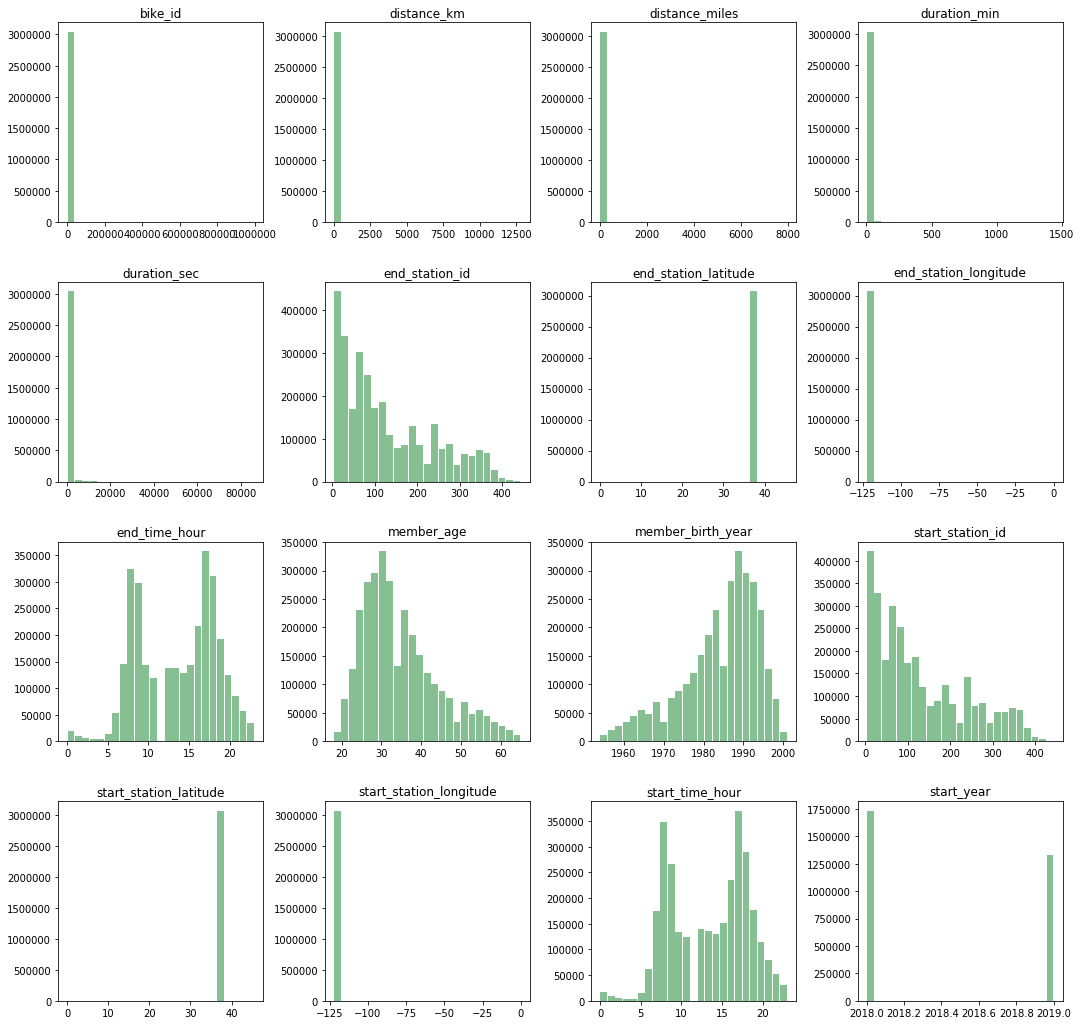

In [189]:
# Lets get a quick Histogram plot up and running.
df.hist(bins=25, grid=False, figsize=(18,18), color='#86bf91', zorder=2, rwidth=0.9);

##### Observation
This highlights some interesting attributes. Member age and birth year look interesting, so we should delve deeper into that, it would look good in some bivariate or multivariate analysis. 

Additionally, start and end times also look like an interesting distribution, let's take a look at these distributions in some deeper detail first.

In [190]:
df.shape

(3067526, 27)

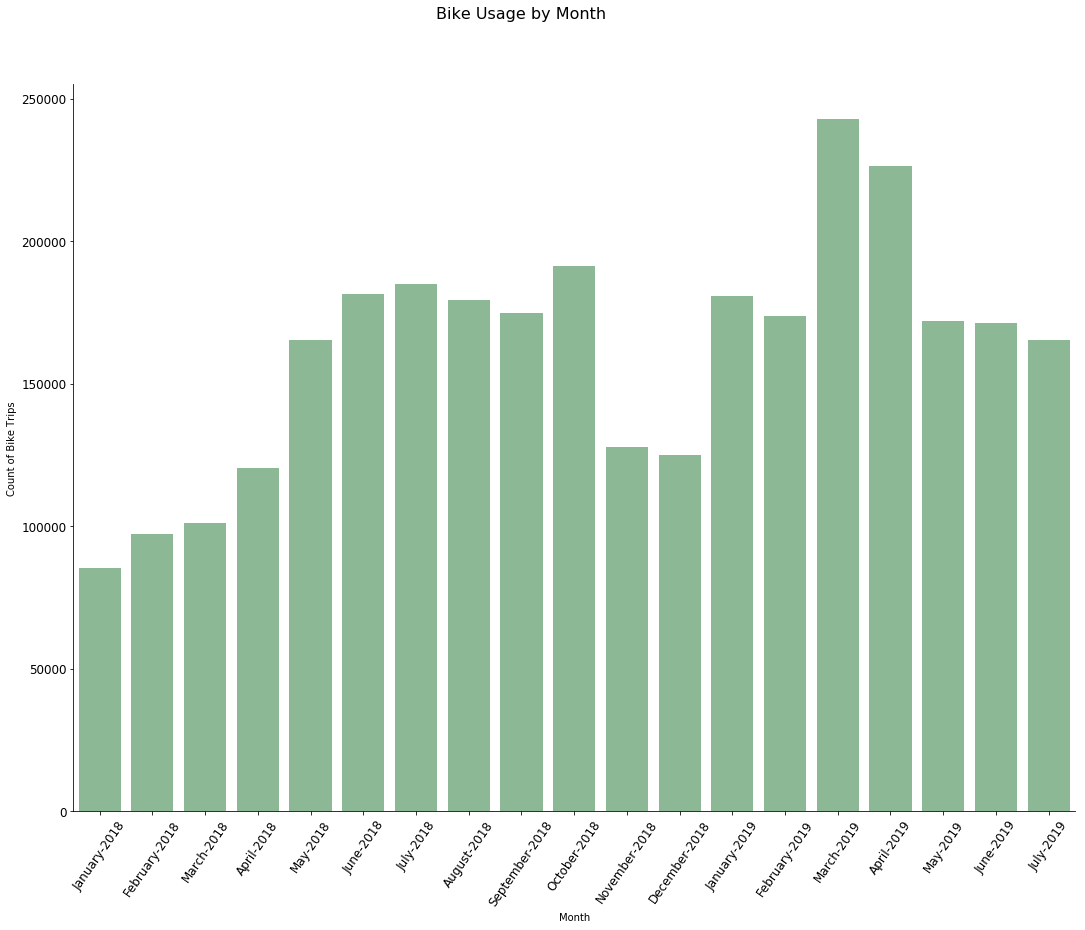

In [191]:
# Monthly usage of the Ford Go Bike system

g = sb.catplot(data = df,  x = 'start_month', kind = 'count', color = '#86bf91');
g.set_axis_labels('Month', 'Count of Bike Trips'),
g.fig.suptitle('Bike Usage by Month', y=1.05, fontsize = 16);
g.fig.set_size_inches(18,12)
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);

##### Observation
Nice. We can see a general growth in trend from 2018 to 2019. Looks like there is a seasonal trend to the data, people are more likely to ues the bikes in the summer, and less likely in the winter months. Growth year on year is interesting - we can see that January, February, March and April all grow substantially year on year, while June and July remain relativley static year on year.

Lets plot the data by weekday to see what the usage trends look like per day

In [192]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colour = '#86bf91'

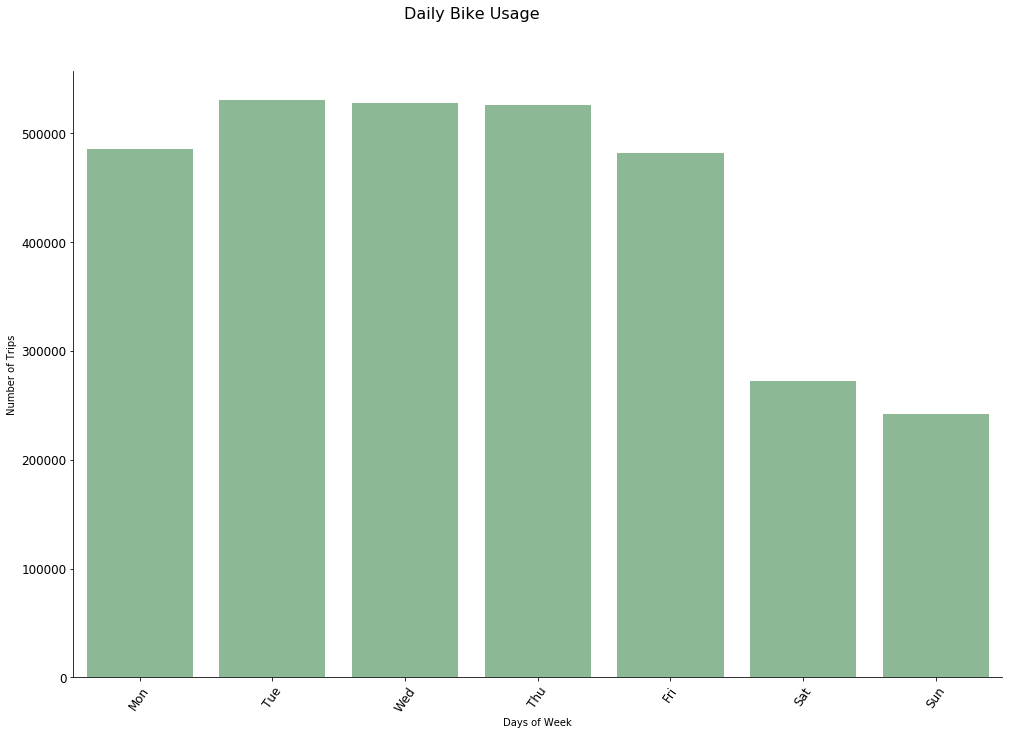

In [193]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df, x='start_weekday', kind='count', color = colour, order = weekday)
g.fig.set_size_inches(16,10)
g.set_axis_labels("Days of Week", "Number of Trips")
g.fig.suptitle('Daily Bike Usage', y=1.05, fontsize=16);
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);

##### Observation
From the above chart, we can see total usage peaks across Tuesday, Wednesday and Thursday. Monday & Friday are close behind. Saturday and Sunday both sit around half the usage. We can interpret this as the majority of users are using the bikes for work-day commute and other activities

To dig a little deeper and to re-enforce this trend, lets take a look at the mean over each weekday

In [194]:
df_weekday = df.groupby(['start_date', 'start_weekday'])['bike_id'].count().reset_index()

In [195]:
df_weekday.head()

,start_date,start_weekday,bike_id
0,01/01/2018,Mon,1011
1,01/01/2019,Tue,2229
2,01/02/2018,Thu,4445
3,01/02/2019,Fri,5794
4,01/03/2018,Thu,2547


In [196]:
# Get me the mean of the trips for a given weekday, indexed by weekday
df_weekday_mean = df_weekday.groupby(['start_weekday']).mean().reindex(weekday) 

In [197]:
df_weekday_mean

,bike_id
start_weekday,
Mon,5854.987952
Tue,6392.361446
Wed,6366.132530
Thu,6421.634146
Fri,5882.414634
Sat,3317.707317
Sun,2946.621951


Looks good! Mean of the counts for each weekday. Lets plot!

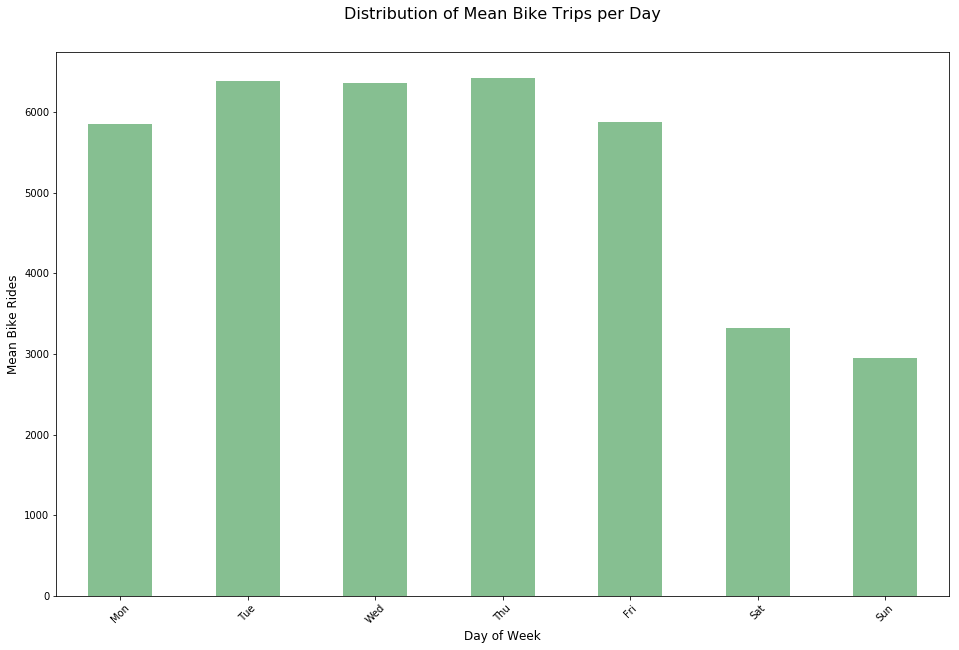

In [198]:
df_weekday_mean.plot(kind = 'bar', figsize=(16,10), color = colour)
plt.xticks(rotation=45)
plt.xticks([0, 1, 2, 3, 4, 5, 6], weekday)
plt.title('Distribution of Mean Bike Trips per Day',  y=1.05, fontsize=16)
plt.xlabel("Day of Week",fontsize= 12)
plt.ylabel("Mean Bike Rides",fontsize= 12)
plt.legend().set_visible(False)

##### Observation
This matches with our previous analysis that highighted weekdays as the peak days for usage. Let's break that down a little further into the hours of the day, to confirm our suspicions that the primary users are likely work day commuters

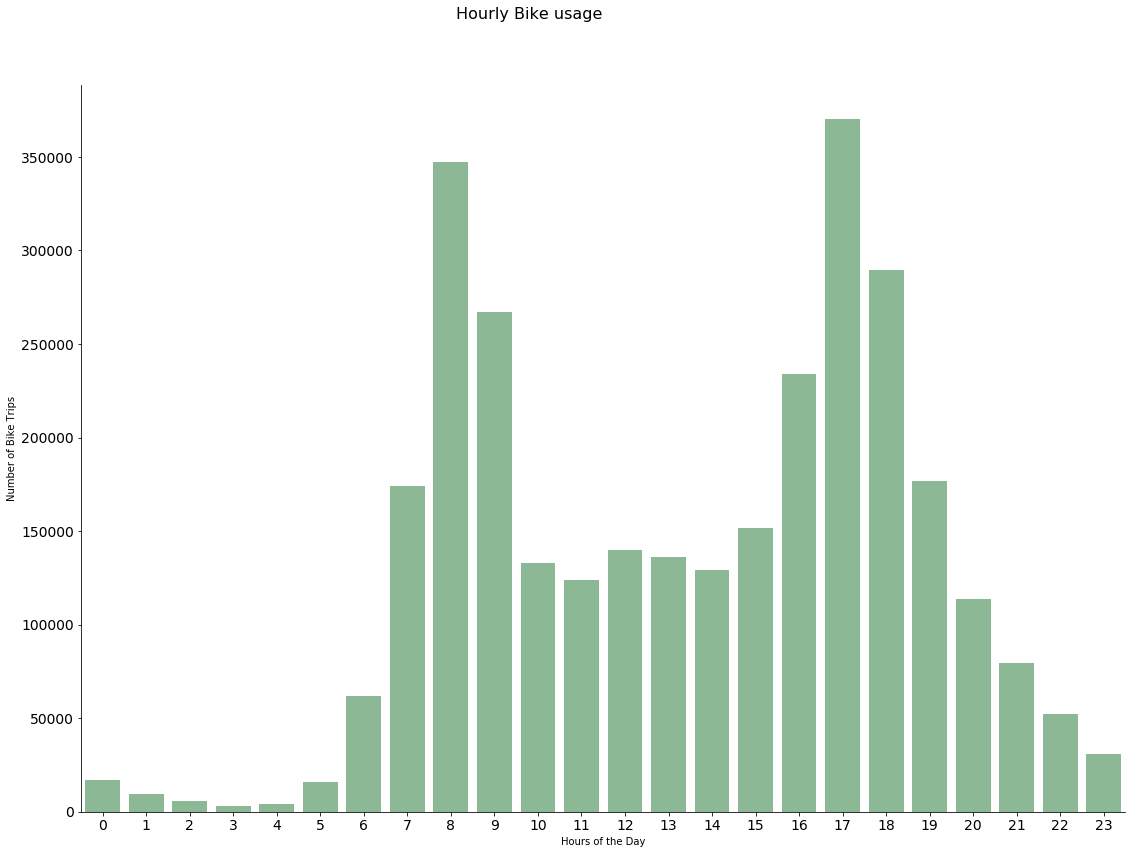

In [199]:
g = sb.catplot(data=df, x='start_time_hour', kind='count', color = colour)
g.set_axis_labels("Hours of the Day", "Number of Bike Trips")
g.fig.set_size_inches(18,12)
g.fig.suptitle('Hourly Bike usage', y=1.05, fontsize=16);
#g.set_xticklabels(rotation=55, fontsize=12);
g.set_xticklabels(fontsize=14);
g.set_yticklabels(fontsize=14);

##### Observation
Brilliant, we can see the distribution is bimodal in nature. Furthermore, this distribution looks to confirm the earlier supposition that the weekday usage is primarily driven by commuters. This is driven by the peak times of 8-9am, and 5-6pm where the majority of the workforce tend to make their daily commute. 

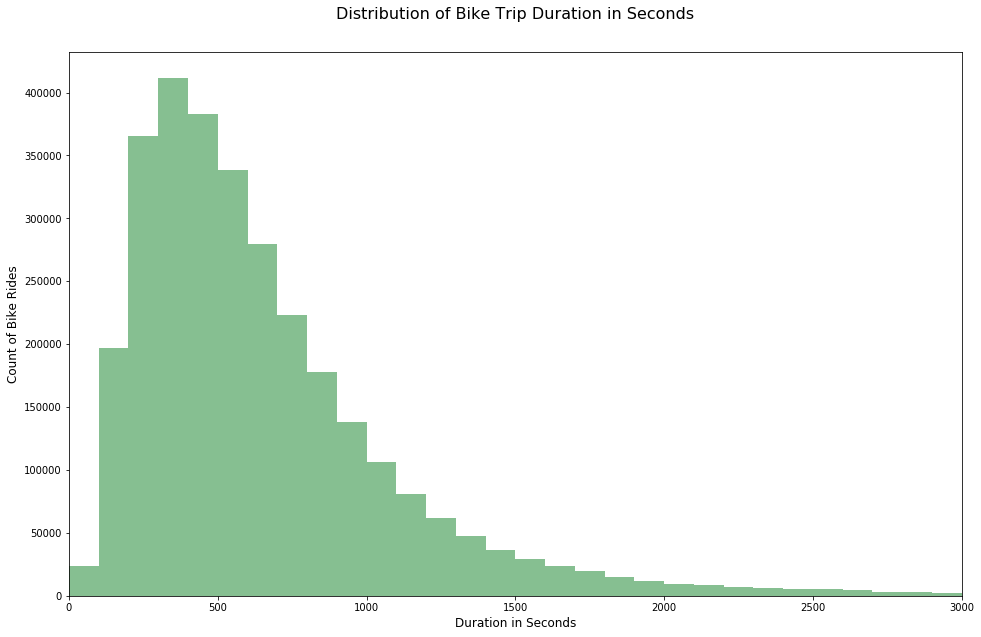

In [200]:
bin_edges = np.arange(0, df['duration_sec'].max() + 100 , 100)
plt.figure(figsize=(16,10))
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges, color = colour)
plt.xlim(0,3000)
plt.title('Distribution of Bike Trip Duration in Seconds',  y=1.05, fontsize=16);
plt.xlabel("Duration in Seconds",fontsize= 12);
plt.ylabel("Count of Bike Rides",fontsize= 12);

Looks like we have a right skewed distribution here, with most durations falling around the 500 second mark. Let's make this slightly clearer...

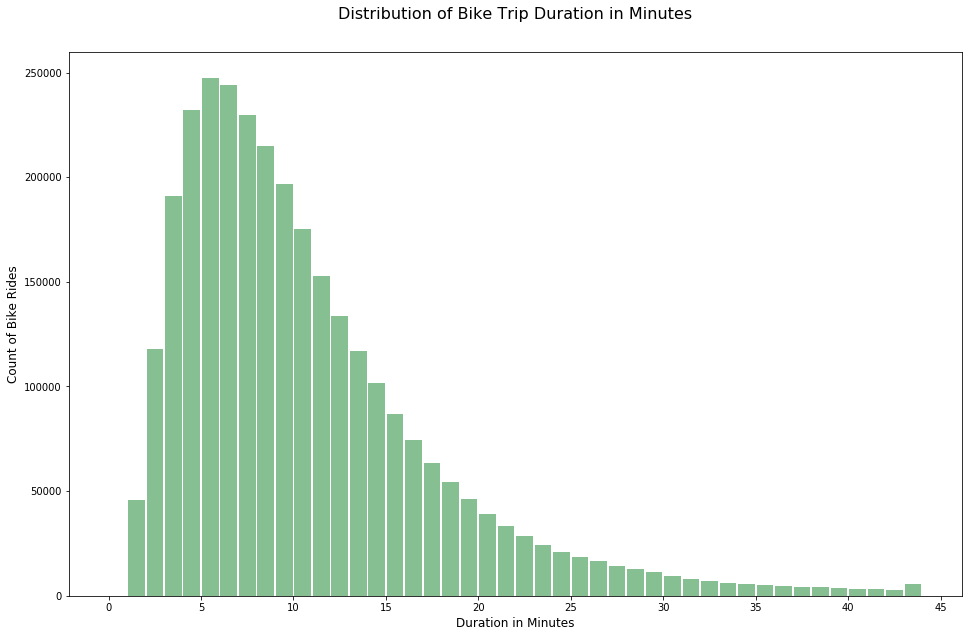

In [201]:
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.figure(figsize=(16,10))
plt.hist(data = df, x = 'duration_min', bins = bin_edges, color = colour, rwidth = 0.9);

plt.title("Distribution of Bike Trip Duration in Minutes", y=1.05, fontsize=16);
plt.xlabel('Duration in Minutes',fontsize= 12);
plt.ylabel("Count of Bike Rides",fontsize= 12);
plt.xticks(ticks, labels);

##### Observation
That's a bit clearer to see. Most cycle journeys look to be a duration of around the 5-10 minutes.

What would be further interesting to see is the length of these cycle trips. Given the majority of cycles of around 5-10 minutes, the majority of journeys will be short distances? 

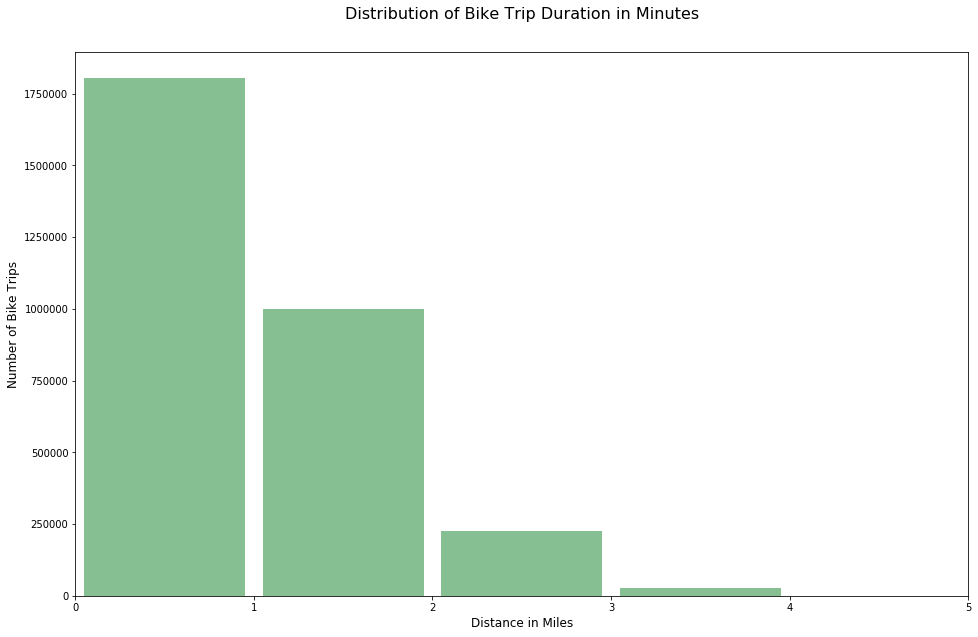

In [202]:
# Distance in miles traveled
bin_edges = np.arange(0, 5, 1)

plt.figure(figsize=(16,10))
plt.hist(data = df, x = 'distance_miles', bins = bin_edges,  color = colour, rwidth = 0.9);

plt.xlabel('Distance in Miles',fontsize= 12)
plt.ylabel('Number of Bike Trips',fontsize= 12);
plt.xlim(0, 5)

plt.title("Distribution of Bike Trip Duration in Minutes", y=1.05, fontsize=16);

##### Observation
From our previous observation, we anticipated shorter distances given the shorter duration times. This chart tends to support that interpretation. The vast majority of bike trips are of a duration of 2 miles or less.

With that, the final area of interest of note was the member demographics. I'd like to take a look at some of those attributes.

Text(0.5, 0.98, 'User Demographics by Number of Bike Rides')

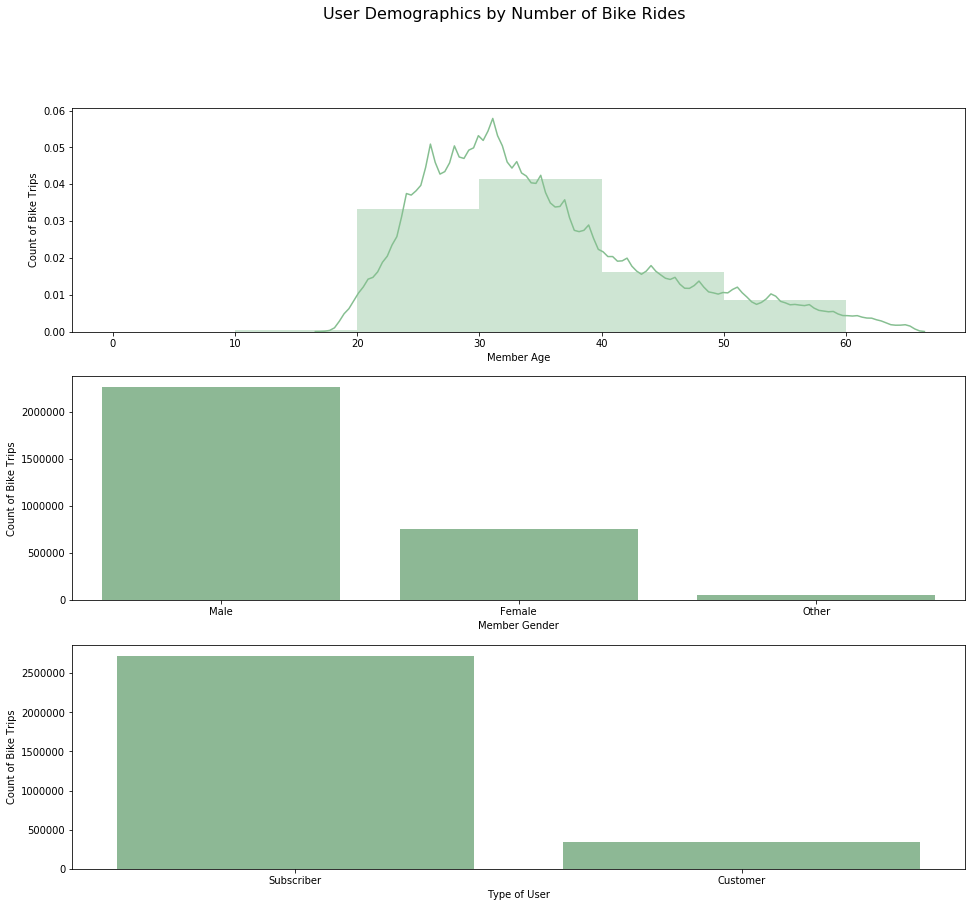

In [203]:
fig, ax = plt.subplots(nrows=3, figsize = [16,14])
age_bin_edges = np.arange(0, 70, 10)

#sb.countplot(data = df, x = 'member_age',  color = colour, ax = ax[0])
sb.distplot(df['member_age'], bins = age_bin_edges, color = colour, ax = ax[0])
sb.countplot(data = df, x = 'member_gender', color = colour, ax = ax[1])
sb.countplot(data = df, x = 'user_type', color = colour, ax = ax[2])
ax[0].set_xlabel('Member Age');
ax[0].set_ylabel('Count of Bike Trips');
ax[1].set_xlabel('Member Gender');
ax[1].set_ylabel('Count of Bike Trips');
ax[2].set_xlabel('Type of User');
ax[2].set_ylabel('Count of Bike Trips');

fig.suptitle('User Demographics by Number of Bike Rides',  fontsize=16)

##### Observation
Fantastic. This gives us a nice snapshot of our customer demographics in one chart. Looks like the majority of bike users are between the ages of 30 and 40, while being more likely to be male and are a subscriber to the rental system.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We started by taking a look at a histogram of all of our attributes. This highlighted some interesting points - distributions of usage and demographics. 

> Looking first into the usage statistics, we found that in the period of note (Jan 2018 to Jan 2019) there were over 3 million bike rides. Plotting against months we noted that summer months saw more usage than winter months, but interestingly January to March in 2019 saw an increase year on year which is encouraging from a business perspective.

> Further we noted from looking into days and hours, that the peak usage time is around the commuting rush hour traffic times (Week days 8-9am and 5pm-6pm). This highlights our primary market is the commuter user.

> We noted that the typical bike ride is most likely to be around 5 to 10 minutes long, and most likely to cover a distance of 2 or fewer miles

> Finally, we delved into plotting user demographics, which highlighted that the majority of members are likely to be male, within the age bracket of 20-40, and have subscribed to the Bike Ride system.

> Visualising with time in seconds is not intuitive to read, so I decided to go back to the cleaning phase and transpose this into minutes. In addition, we also added a step to the cleaning phase of the wrangling process to work out distance travelled.
> 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> After looking into time, I was surprised to note that the usage durations were so low. To further expand on this,, I decided to try and determine the distances travelled to see if the the short times correponded to short distances, and added this to the cleaning phase of the wrangling process. Doing this confirmed the durations were correct, since distances were correspondingly low.

> For distance travelled, since the bulk of the data was under 5 miles, the chart was large and skewed out to larger distances but with very few cases. I altered the x limit sizes to 'zoom' into the majority of the data using <code>plt.xlim(0, 5)</code> 

## Bivariate Exploration  <a class="anchor" id="bivariate"></a>

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

Lets start by expanding on our visualization of the usage times. We individually verified the usage times on Times and on Days, let's take a look at these combined.

In [204]:
# Order on categorical weekday values
df['start_weekday'] = pd.Categorical(df['start_weekday'], 
                                                categories=weekday, 
                                                ordered=True)
df_usage = df.groupby(["start_time_hour", "start_weekday"])["bike_id"].size().reset_index()
df_usage = df_usage.pivot("start_time_hour", "start_weekday", "bike_id")


In [205]:
df_usage.sample(3)

start_weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
start_time_hour,,,,,,,
11,15622,16364,16772,17497,18337,20715,18344
13,16932,17481,18472,18303,19845,23523,21407
15,19341,20725,21674,21711,24085,22718,21265


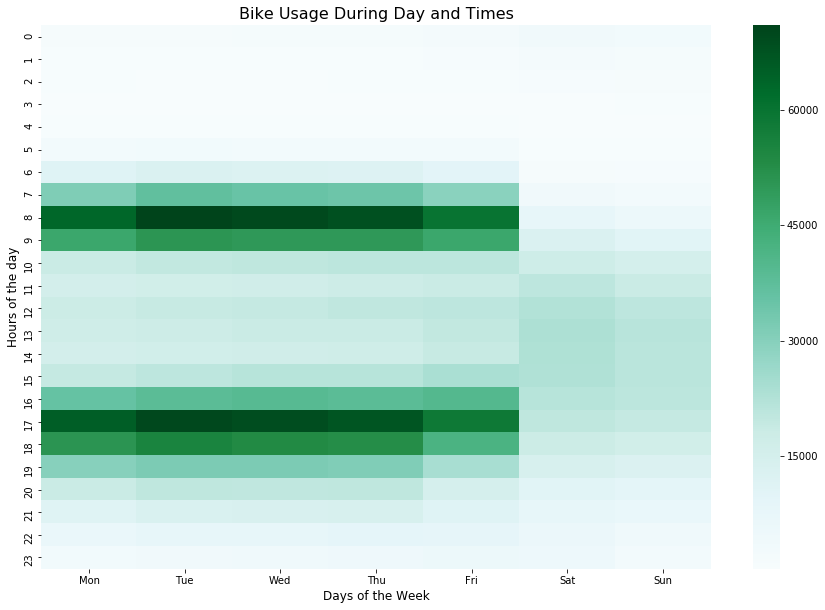

In [206]:
plt.figure(figsize=(15,10))
sb.heatmap(df_usage, annot=False, cmap="BuGn")

plt.xlabel('Days of the Week',fontsize= 12)
plt.ylabel('Hours of the day',fontsize= 12);
#plt.yticks(rotation=90)
plt.title("Bike Usage During Day and Times", y=1.05, fontsize=16);


##### Observation
Using a heatmap to combine times and days, we can see the strong points of usage confirming the commute times during rush hour on mid-week days. There is a wider spread of usage across other times at the weekend.

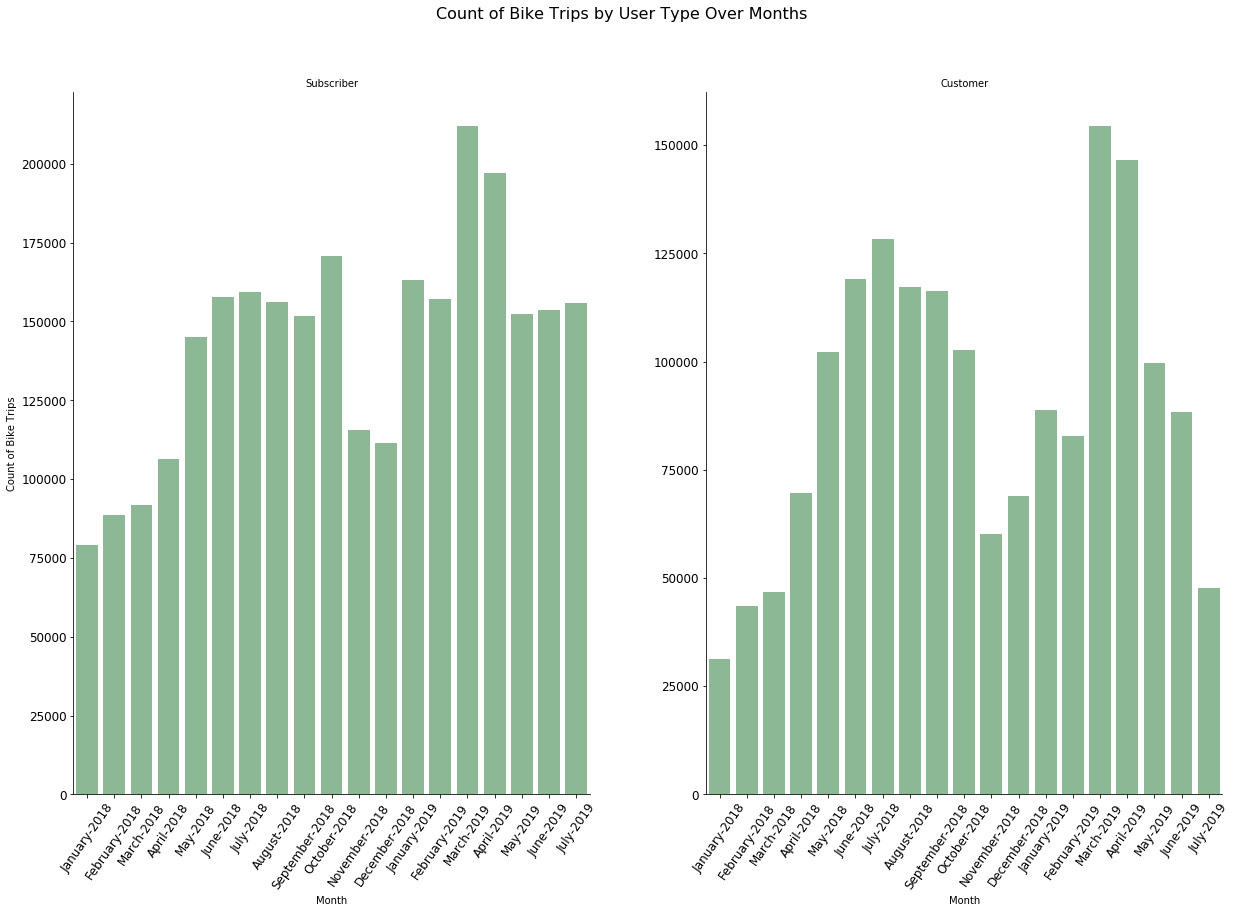

In [222]:
# monthly usege of the bike sharing system per user type
g = sb.catplot(data=df, x='start_month', col="user_type", kind='count', sharey = False,
            color = colour)
g.fig.set_size_inches(18,12)
g.set_axis_labels("Month", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);
g.fig.suptitle('Count of Bike Trips by User Type Over Months', y=1.03, fontsize=16);



##### Observation
As we can see above, there is a marked decrease in bike rental activity by each user type. Interestingly they both generally share the same trends over the seasons.

How about checking hourly usage for any divergence of the pattern

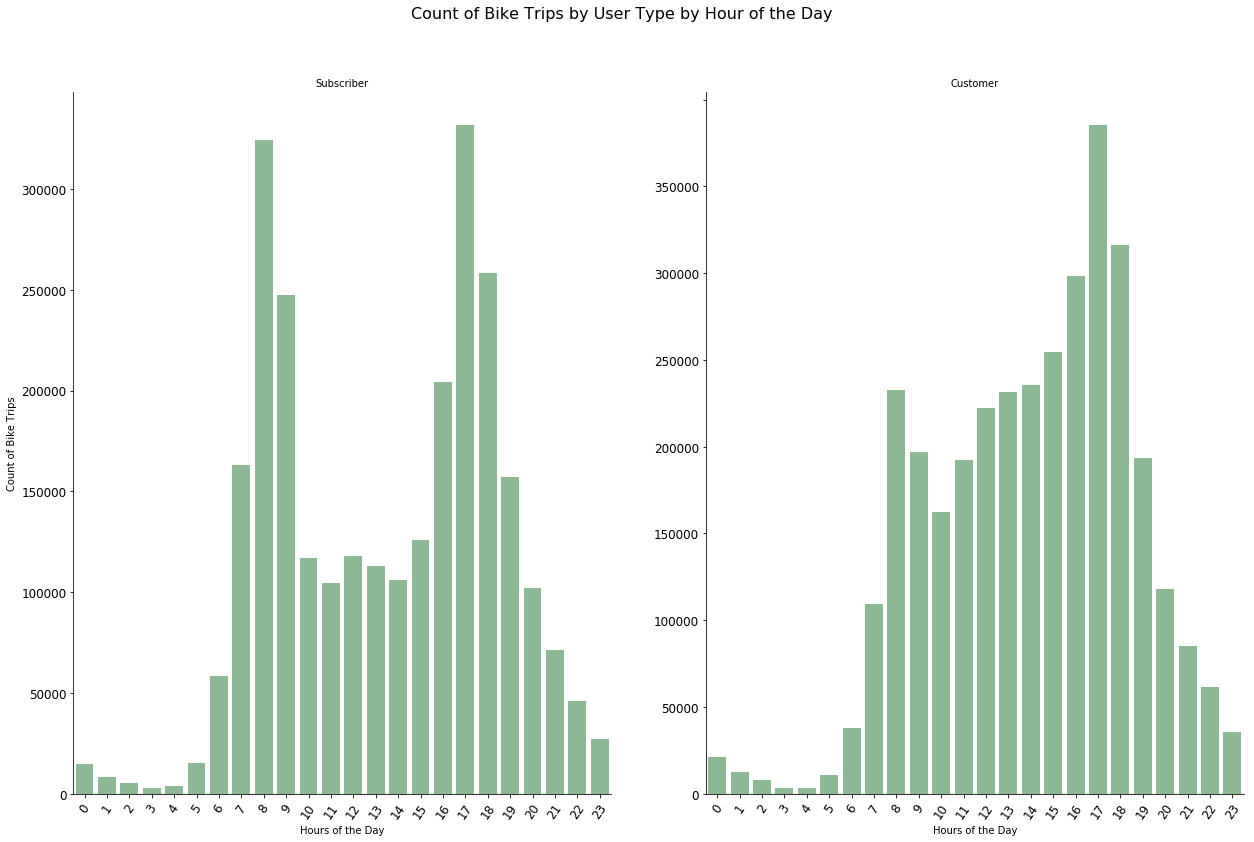

In [223]:
g = sb.catplot(data=df, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = colour)
g.fig.set_size_inches(18,12)
g.set_axis_labels("Hours of the Day", "Count of Bike Trips")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=55, fontsize=12);
g.set_yticklabels(fontsize=12);
g.fig.suptitle('Count of Bike Trips by User Type by Hour of the Day', y=1.03, fontsize=16);


##### Observation
Interesting! While the Subscriber user type resembles the overall hourly usage pattern, by digging deeper into user type we discover that the smaller subset of Customers is more evenly spread throughout all hours between 8am and 7pm, although still bimodal, it is not as severe a dop off outside of the rush hour rentals, compared to the Subscriber.

This looks like it lends itself to a theory that Subscribers are more likely to be using the Bikes for daily work day commutes, while Customers are possibly more leisurely. 

Let's attempt to drill into that theory, and see if we can find another way to confirm that.

Note: After plotting, I discovered outliers, so I'm checking here for what reasonable values to filter for 

In [209]:
df.distance_miles.describe()

count    3.067526e+06
mean     1.067162e+00
std      1.979509e+01
min      0.000000e+00
25%      5.503885e-01
50%      8.716070e-01
75%      1.332926e+00
max      7.952522e+03
Name: distance_miles, dtype: float64

In [210]:
df.distance_miles.describe(percentiles = [.999])

count    3.067526e+06
mean     1.067162e+00
std      1.979509e+01
min      0.000000e+00
50%      8.716070e-01
99.9%    4.330345e+00
max      7.952522e+03
Name: distance_miles, dtype: float64

Looks like the 99.9th percentile is 4.33 miles. A reasonable inclusion for the distance attribute would be between 0.01 and 5 miles.

(-0.3502518249193916, 5.3395121878797855)

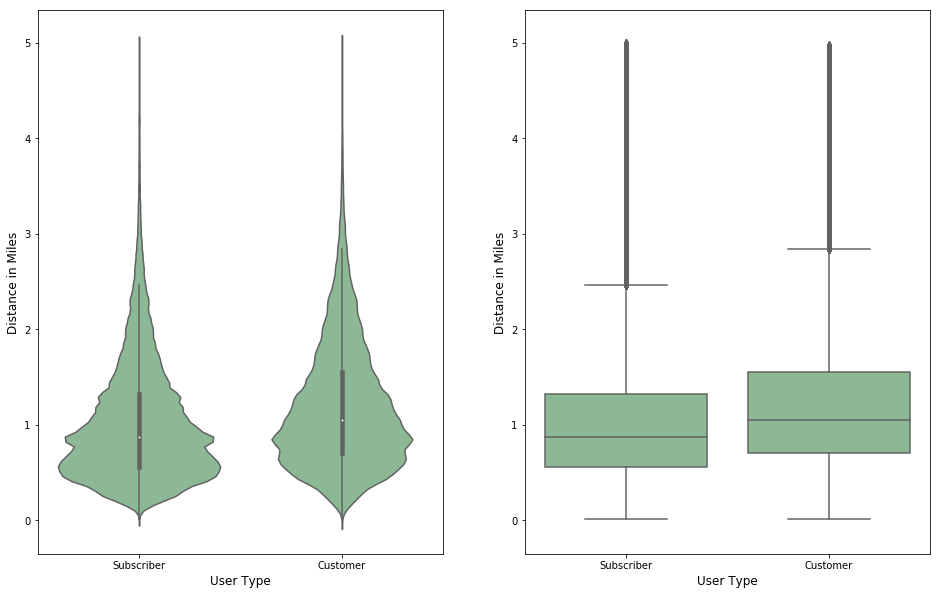

In [211]:
plt.figure(figsize = [16, 10])

plt.title("Number of Bike Rides by User Types by Number of Bike Rides", y=1.05, fontsize=16);
# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df.query('distance_miles>0.01  and distance_miles < 5'), x = 'user_type', y = 'distance_miles', color = colour)
plt.xlabel('User Type',fontsize= 12)
plt.ylabel('Distance in Miles',fontsize= 12);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df.query('distance_miles>0.01  and distance_miles < 5'), x = 'user_type', y = 'distance_miles', color = colour)
plt.xlabel('User Type',fontsize= 12)
plt.ylabel('Distance in Miles',fontsize= 12);

plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot);


##### Observation
Interesting - After limiting the data to exclude outliers, we can plot a violin & box plot to compare Subscriber user types to Customer user tpes. There is a slight, but noticable difference in the mean distances travelled; Customers are slightly higher than Subscribers. This may be related to trend of subscribers being more likely to use the Bike rental for commute, while customers are not commuting.

Having looked at Distance travelled by User Type, can we discern any interesting information from the age range of our demographics?

In [212]:
group_means = df.groupby(['age_bracket']).count()
age_order = group_means.sort_values(['age_bracket'], ascending = True).index

In [213]:
#Check the order
age_order

Index(['0 - 18', '19 - 25', '26 - 35', '36 - 45', '46 - 55', '56 - 65'], dtype='object', name='age_bracket')

D:\Program_Files\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Program_Files\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
D:\Program_Files\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
D:\Program_Files\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
D:\Program_Files\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure

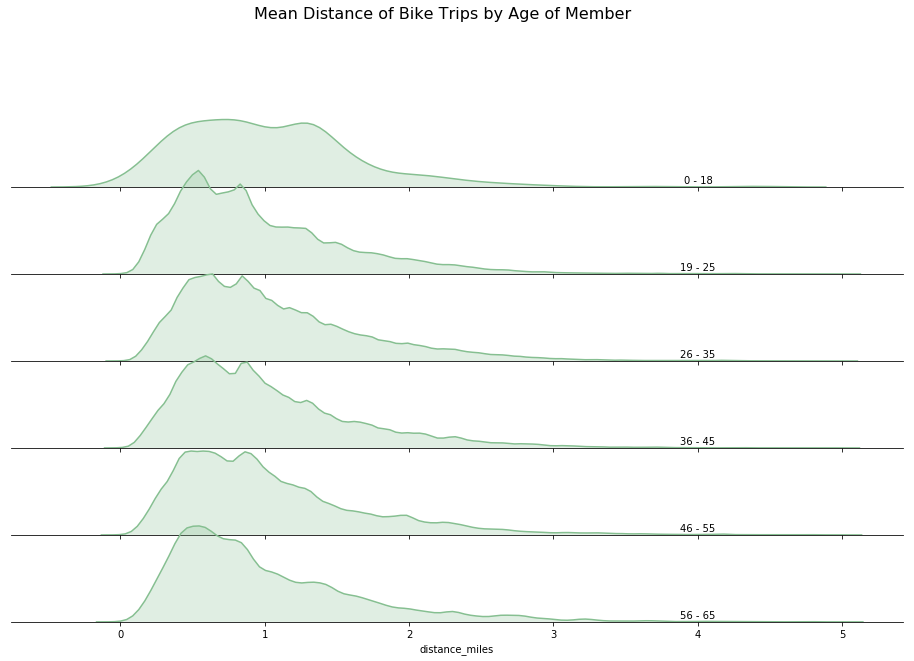

In [214]:
g = sb.FacetGrid(data = df.query('distance_miles>0.01  and distance_miles < 5'), row = 'age_bracket', size = 0.5, aspect = 12,
                 row_order = age_order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'distance_miles', color = colour, shade = True)

g.fig.set_size_inches(16,10)
g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'age_bracket')
g.set_xlabels('distance_miles')
g.set_titles('')
g.fig.suptitle('Mean Distance of Bike Trips by Age of Member', fontsize=16);

##### Observation
We can see that the distributions of mean distances travelled for each age bracket is quite consistent. It doesn't look like anything jumps out as interesting or unusual.

Perhaps continuing our user_Type demographic investigation may be of interest...

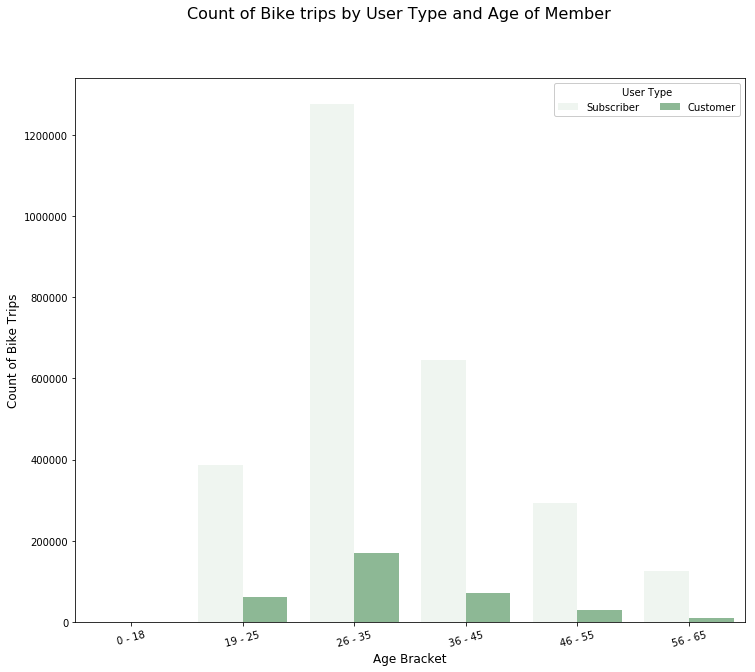

In [215]:

fig, ax = plt.subplots(figsize=[12,10])

ax = sb.countplot(data = df, x = 'age_bracket', hue = 'user_type', color=colour, order=age_order)

ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'User Type')
plt.xticks(rotation = 15)
plt.xlabel('Age Bracket',fontsize= 12)
plt.ylabel('Count of Bike Trips',fontsize= 12);

fig.suptitle('Count of Bike trips by User Type and Age of Member', fontsize=16);

##### Observation
Here we use a clustered bar chart to display the categories from user type compared to age brackets to determine count of bike trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> By combining the hours of the day and day of the week, we could see hot spots of usage across the entire week with bivariate exploration. 

> Introducing user type to the analysis revealed different behaviors in terms of bike usage between the user types. customers and subscribers. The visuals suggests that subscribers look to be commuters, while customers are leisure riders since subscribers are most likely to use the bikes Monday to Friday at around -9am and 5-6pm, while customers have a broader more even distribution of times, with an increase in weekend activity.

> Continuing with user type investigation, we found that mean distance trip times and mean distances are low, there is a noticable increase in both means for the customer user_Type over the subscriber. While there was not much differentiation in distance travelled by age bracket

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscriber user types seem to have more common, shorter travel durations and distances, while customers are longer in each case which is of interest.

## Multivariate Exploration  <a class="anchor" id="multivariate"></a>

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

First, let's introduce gender as our 3rd variable in addition to User Type and Age Bracket. Can we discern any usage differences between the genders?

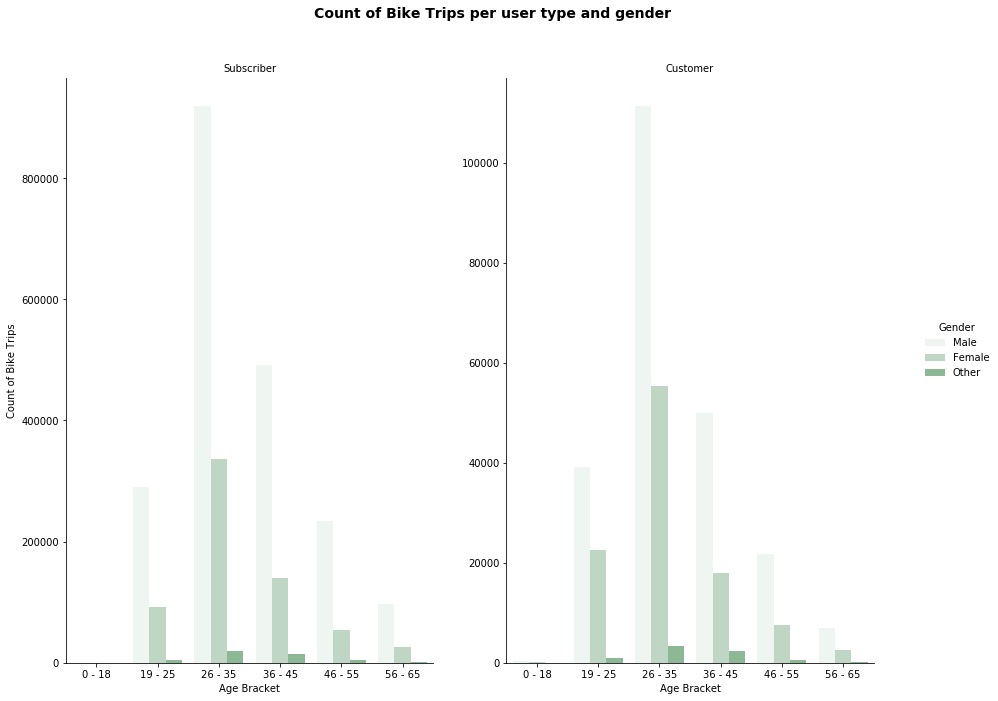

In [216]:


g = sb.catplot(data=df, x='age_bracket', col="user_type", hue="member_gender", color=colour, kind='count', sharey = False, order=age_order)
g.fig.set_size_inches(14,10)
g.set_axis_labels("Age Bracket", "Count of Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Count of Bike Trips per user type and gender', y=1.03, fontsize=14, fontweight='semibold');


##### Observation
What we can see here is that for the Subscriber user type, the user is much more likely to be male than female. While for the customer user type, the difference is closer but still greatly in favour in males. This would indicate an opportunity for growth if we can expand the number of female users

In [224]:
df_usage_0_18 = df[df['age_bracket']=='0 - 18']
df_usage_19_25 = df[df['age_bracket']=='19 - 25']
df_usage_26_35 = df[df['age_bracket']=='26 - 35']
df_usage_36_45 = df[df['age_bracket']=='36 - 45']
df_usage_46_55 = df[df['age_bracket']=='46 - 55']
df_usage_56_65 = df[df['age_bracket']=='56 - 65']

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,...,start_date,start_month,start_year,start_weekday,start_time_hour,end_time_hour,duration_min,distance_km,distance_miles,age_bracket
1740396,959,No,659,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-31 10:46:32.750,2001.0,Female,...,31/01/2019,January-2019,2019,Thu,10,10,10,1.921719,1.194101,0 - 18
1742728,3044,No,574,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2019-01-31 07:57:39.621,2001.0,Female,...,31/01/2019,January-2019,2019,Thu,7,7,9,1.247334,0.775057,0 - 18
1749410,1807,No,637,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-30 09:47:09.328,2001.0,Female,...,30/01/2019,January-2019,2019,Wed,9,9,10,1.921719,1.194101,0 - 18
1767399,2166,No,702,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-28 09:45:34.525,2001.0,Female,...,28/01/2019,January-2019,2019,Mon,9,9,11,1.921719,1.194101,0 - 18
1774110,3284,No,654,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2019-01-27 09:53:18.498,2001.0,Female,...,27/01/2019,January-2019,2019,Sun,9,9,10,1.310345,0.814210,0 - 18
1774265,1807,No,1107,241.0,37.852477,-122.270213,Ashby BART Station,2019-01-27 08:49:23.981,2001.0,Female,...,27/01/2019,January-2019,2019,Sun,8,8,18,1.631512,1.013774,0 - 18
1785716,2745,No,684,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-25 09:21:59.679,2001.0,Female,...,25/01/2019,January-2019,2019,Fri,9,9,11,1.921719,1.194101,0 - 18
1793649,1554,No,733,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-24 10:11:25.430,2001.0,Female,...,24/01/2019,January-2019,2019,Thu,9,10,12,1.921719,1.194101,0 - 18
1802543,1474,No,2636,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-23 09:41:11.517,2001.0,Female,...,23/01/2019,January-2019,2019,Wed,8,9,43,1.921719,1.194101,0 - 18
1810073,12,No,1684,246.0,37.869060,-122.270556,Berkeley Civic Center,2019-01-22 12:19:27.950,2001.0,Female,...,22/01/2019,January-2019,2019,Tue,11,12,28,1.921719,1.194101,0 - 18


In [225]:

df_usage_user_0_18 = df_usage_0_18.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_0_18 = df_usage_user_0_18.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_19_25 = df_usage_19_25.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_19_25 = df_usage_user_19_25.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_26_35 = df_usage_26_35.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_26_35 = df_usage_user_26_35.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_36_45 = df_usage_36_45.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_36_45 = df_usage_user_36_45.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_46_55 = df_usage_46_55.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_46_55 = df_usage_user_46_55.pivot("start_weekday", "start_time_hour", "bike_id")

df_usage_user_56_65 = df_usage_56_65.groupby(["start_weekday", "start_time_hour"])["bike_id"].size().reset_index()
df_usage_user_56_65 = df_usage_user_56_65.pivot("start_weekday", "start_time_hour", "bike_id")


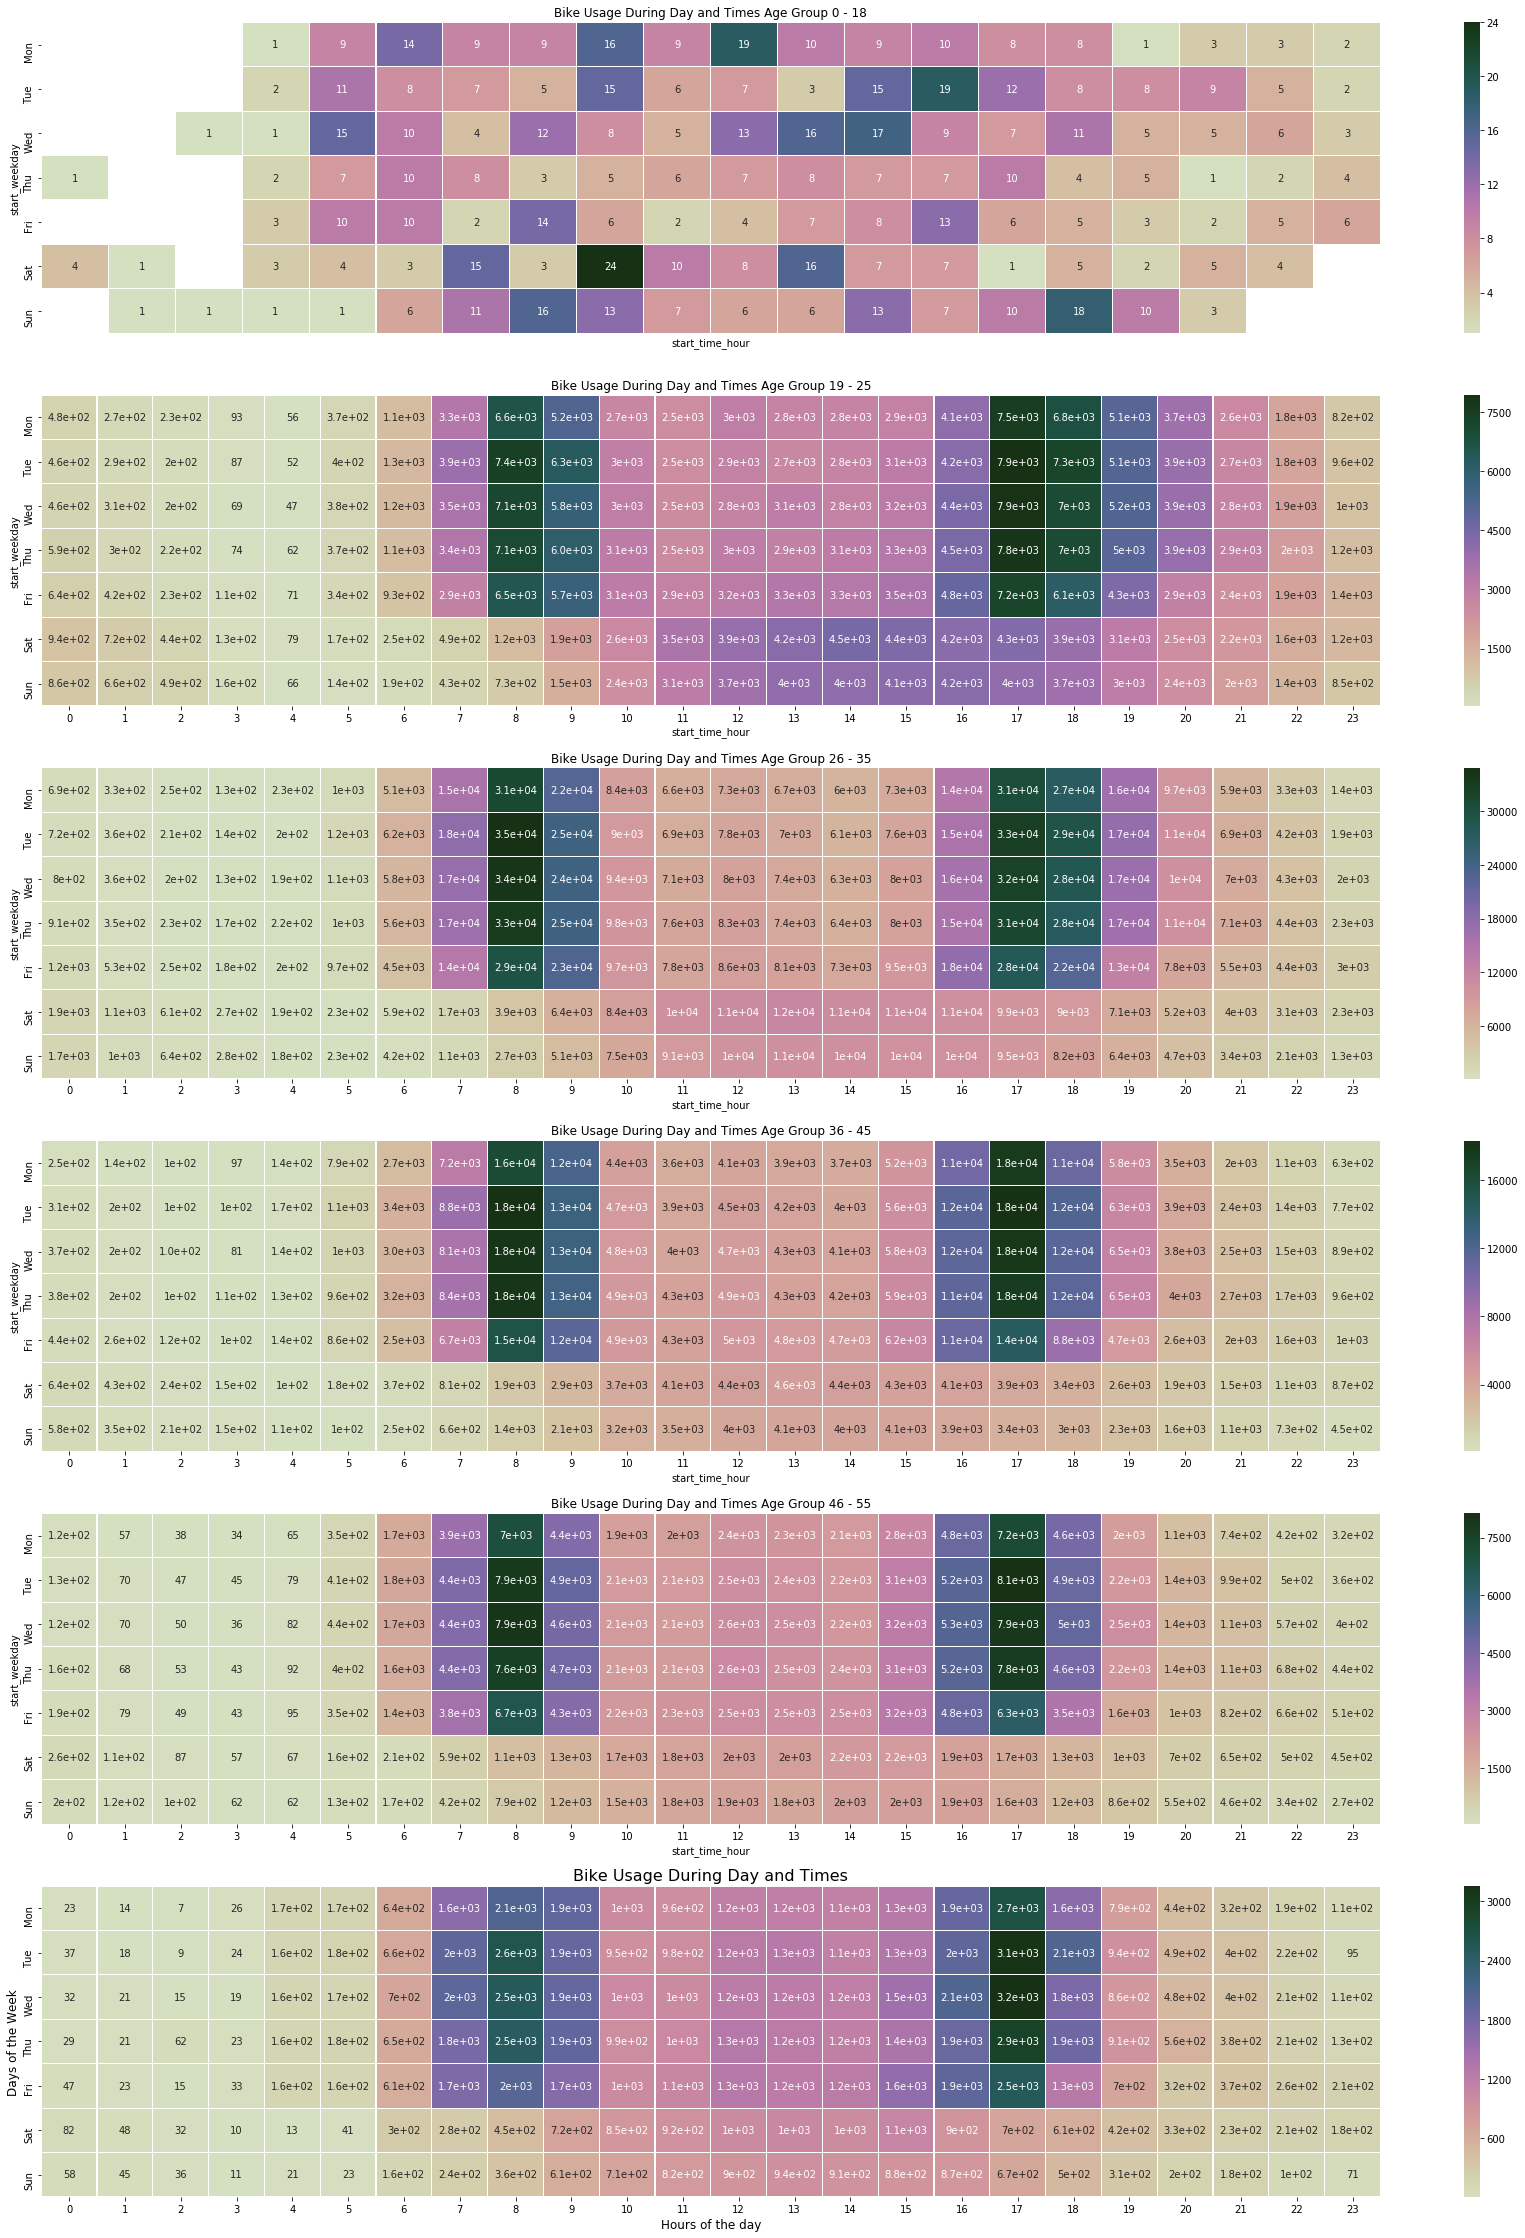

In [234]:
#plt.figure(figsize=(15,10))
f, [axA, axB, axC, axD, axE, axF] = plt.subplots(figsize=(30, 40), nrows=6)
cmap = sb.cubehelix_palette(start=1.3, rot=1.3, as_cmap=True)
sb.heatmap(df_usage_user_0_18, annot=True, cmap=cmap, linewidths=0.05, ax=axA, xticklabels=False )
sb.heatmap(df_usage_user_19_25, annot=True, cmap=cmap, linewidths=0.05, ax=axB )
sb.heatmap(df_usage_user_26_35, annot=True, cmap=cmap, linewidths=0.05, ax=axC )
sb.heatmap(df_usage_user_36_45, annot=True, cmap=cmap, linewidths=0.05, ax=axD )
sb.heatmap(df_usage_user_46_55, annot=True, cmap=cmap, linewidths=0.05, ax=axE )
sb.heatmap(df_usage_user_56_65, annot=True, cmap=cmap, linewidths=0.05, ax=axF )


axA.set_title('Bike Usage During Day and Times Age Group 0 - 18')
axB.set_title('Bike Usage During Day and Times Age Group 19 - 25')
axC.set_title('Bike Usage During Day and Times Age Group 26 - 35')
axD.set_title('Bike Usage During Day and Times Age Group 36 - 45')
axE.set_title('Bike Usage During Day and Times Age Group 46 - 55')
axF.set_title('Bike Usage During Day and Times Age Group 56 - 65')

plt.xlabel('Hours of the day',fontsize= 12)
plt.ylabel('Days of the Week',fontsize= 12);
#plt.yticks(rotation=90)
plt.title("Bike Usage During Day and Times", y=1.05, fontsize=16);

##### Observation
When we split the usage times by age group, we see some interesting fators. the 0-18 age group usage is low in comparison, but not tied to any particular usage time. the 26-35 age group has the strongest relation to the peak hours of 8-9am and 5-6pm, Monday to Friday. Other age groups have this same correlation, but become more spread throughout the day as we look at the older age groups, in particular in group 56 - 65 we can see a heavier usage mid-day, which would indicate fewer commuters, aligning to the increased likelihood of retirees in this age group

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We discovered that users are over whelmingly male. Interestingly the ratio is close in the customer user type as opposed to the subscriber. This would suggest a gret opportunity of growth for the company by doing more to enticie female gender to use bike rentals. 

> We further delved into usage times by splitting accross age group. This strengthened our understanding of the peak usage times of 8-9am and 5-6pm Monday to Friday, but interestingly we start to see that the primary work force age groups of 26 - 35 and 36 - 45 are the leading users at this time. While younger age groups - 18 - 25 hav an increased level of usage spread throughout the day, possibly relating to more leisure or student usage. As well as the older age groups 46 - 55 and 56 - 65, there is an increased usage outside of the main commute times, indicating increased levels of leisure activity rather than commute purpose as the reason for the bike use.

### Were there any interesting or surprising interactions between features?

> While the massive difference in gender usage was surprising, we found that in previous analysis. However, it was interesting that the ratio of male to female was a lot closer in the customer user_type over the subscriber use_type. I would like to dig into this more.

***
# Conclusion <a class="anchor" id="conclusion"></a>

Our analysis has of the GoBike data from the San Francisco bay area has led us to the conclusion that the bike rental system is well utilised, with over 3 million trips since January 2018. Being an economical, environmentally friendly system that we should look to take advantage of and grow.
- The majority of users are male, which gives growth opportunity in the female demographic
- Most likely time of use is 8-9am and 5-6pmp, Monday to Friday, leading us to believe the rentals are mostly for commute purposes. 
- Customer user types are generally used throughout the day, but more likely at the weekend. Leading us to believe there is a small market for leisure or holiday users, but there could be growth potential here.
- Users are by far most likely to be within hte 26 - 35 age bracket.

***
# References <a class="anchor" id="references"></a>

- Exporting to a CSV [StackOverflow](https://stackoverflow.com/questions/22872952/set-file-path-for-to-csv-in-pandas)
- Calculating Distance using the [Haversine formula](https://www.movable-type.co.uk/scripts/latlong.html) and referencing [StackOverflow](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points)
- Use [strftime](https://www.programiz.com/python-programming/datetime/strftime) to get date parts
- Sorting a dataframe by Weekday from [StackOverflow](https://stackoverflow.com/questions/47741400/pandas-dataframe-group-and-sort-by-weekday)
- Remove a legend from [StackOverflow](https://stackoverflow.com/questions/5735208/remove-the-legend-on-a-matplotlib-figure)
- Seaborn colour pallettes on [Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)